<a href="https://colab.research.google.com/github/TiaErikaDev/ADA-Tecnicas_Programacao-II/blob/main/An%C3%A1lise_Explorat%C3%B3ria_Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise exploratória da base de dados da Netflix**

---




Considere a base de dados **Netflix**, que contém informações de todo o catálogo da rede de streaming. Esta base de dados contém dados que podem ser importantes para os diferentes títulos adicionados. Explore a base de dados e extraia informações que podem ser úteis para esse tipo de problema. Lembre-se que este problema é de escopo aberto, então busque informações e relações que podem ser importantes. 

### Importando as bibliotecas

---



In [75]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px

### Verificando o dataset e suas informações

---



In [23]:
dfnet = pd.read_csv('https://raw.githubusercontent.com/mdrs-thiago/uerj-topicos-a/main/datasets/netflix_titles.csv')

In [24]:
dfnet.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [25]:
dfnet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [26]:
dfnet.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

### Fazendo a limpeza da base de dados

---



In [48]:
dfnet = dfnet.fillna({'director':'Anonymous','cast':'NA','country':'Other'}).dropna()
dfnet.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

### Transformando a data

---



In [49]:
dfnet['date_added'] = pd.to_datetime(dfnet['date_added'])
dfnet.head(4)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NA,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Anonymous,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Other,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Anonymous,NA,Other,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."


### Separando as entradas em Movies e Séries

---



In [50]:
movies = dfnet[dfnet['type'] == 'Movie']
series = dfnet[dfnet['type'] == 'TV Show']

### Criando uma coluna com a duração dos filmes em minutos

---



In [51]:
movies['duration_min'] = movies['duration'].map(lambda x: int(x.split()[0]))

<ipython-input-51-358a8099fd19>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['duration_min'] = movies['duration'].map(lambda x: int(x.split()[0]))


## **Quantidade de filmes e séries**

---



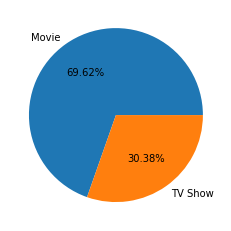

In [30]:
plt.pie(x=dfnet_grouped['type'], labels=dfnet_grouped.index, autopct='%.2f%%');

## **Paises com maiores produções**

---



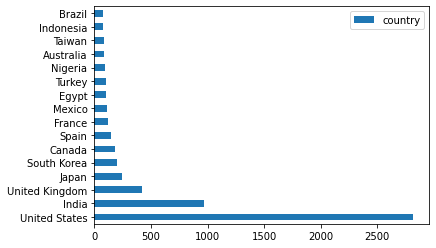

In [31]:
dfnet['country'].value_counts().to_frame().head(16).plot(kind='barh');

## **Quantidade de produções por ano**

---



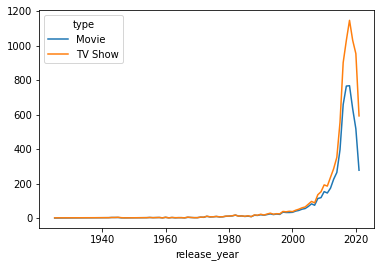

In [105]:
dfnet.groupby(['release_year','type']).size().unstack().plot(kind='line', stacked=True);

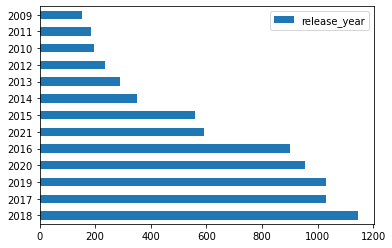

In [32]:
dfnet['release_year'].value_counts().to_frame().head(13).plot(kind='barh');

## **Quantidade por Gênero**

---



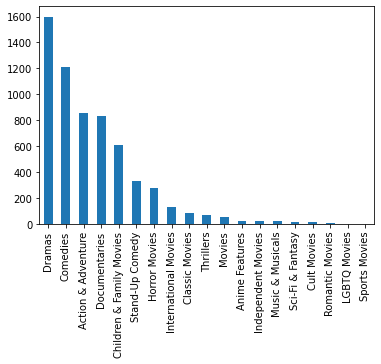

In [84]:
#Quantidade de Movies por gênero
generos_movie = []
for x in dfnet[dfnet["type"] == "Movie"]["listed_in"]:
    genero_movie = str(x.split(", ")[0])
    generos_movie.append(genero_movie)
    
    
dados_movie_contagem_genero = pd.DataFrame(generos_movie, columns = ["Contagem"])
contagem_movie = dados_movie_contagem_genero["Contagem"].value_counts()

contagem_movie.plot(kind='bar');

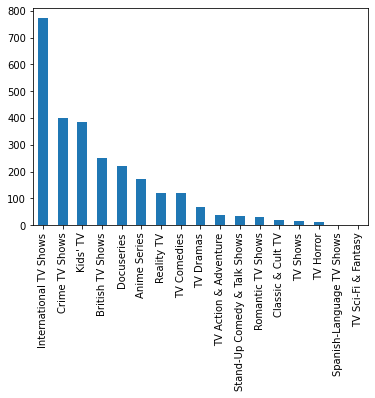

In [85]:
#Quantidade de Séries por gênero
generos_tv = []
for x in dfnet[dfnet["type"] == "TV Show"]["listed_in"]:
    genero_tv = str(x.split(", ")[0])
    generos_tv.append(genero_tv)
    
    
dados_tv_contagem_genero = pd.DataFrame(generos_tv, columns = ["Contagem"])
contagem_tv = dados_tv_contagem_genero["Contagem"].value_counts()

contagem_tv.plot(kind='bar');

## **Quantidade de produções por classificação**
* TV-MA: 18+
* TV-14: 16+
* TV-PG: 7+
* R: -17 (Supervisão dos pais)
* PG-13: 13+
* TV-Y7: 7+
* TV-Y: sem classificação
* PG: 7+
* TV-G: sem classificação

---



In [35]:
dfnet['rating'].value_counts().to_frame()

,rating
TV-MA,3207
TV-14,2160
TV-PG,863
R,799
PG-13,490
TV-Y7,334
TV-Y,307
PG,287
TV-G,220
NR,80


## **Distribuição da duração dos filmes da netflix**

---



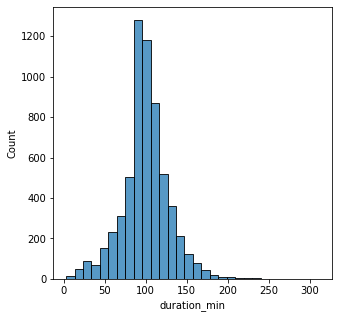

In [59]:
plt.figure(figsize=(5,5))
sns.histplot(movies, x='duration_min', bins=30);

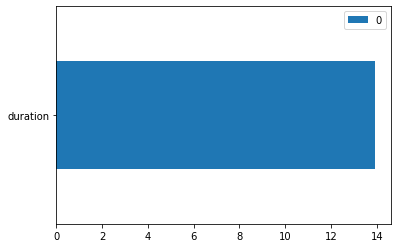

In [36]:
#Tempo de duração de todos os filmes do catálogo da netiflix têm duração de 14 meses
movie = dfnet[dfnet['type']=='Movie']
movie=movie['duration'].str.rstrip('min').to_frame()
((movie.dropna().astype(int).sum().to_frame())/43800).plot(kind='barh');

## **Distribuição de séries por temporada**

---



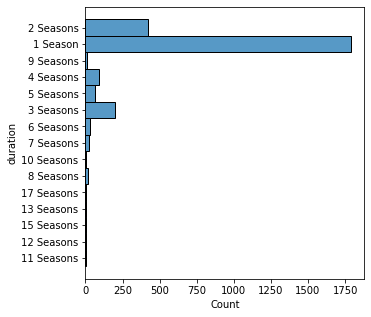

In [63]:
plt.figure(figsize=(5,5))
sns.histplot(series, y='duration');

## **Efeito da pandemia**


*   Comparar a média de filmes lançados por ano antes da pandemia e durante a pandemia 
*   Qual categoria que mais foi lançada durante a pandemia
*   Paises que mais lançaram filmes e séries 





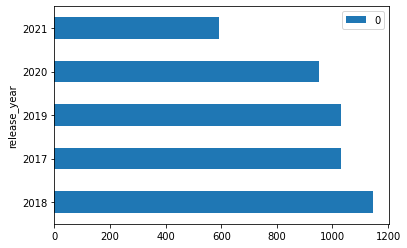

In [38]:
dfnet[dfnet['release_year']>=2017].value_counts('release_year').to_frame().plot(kind='barh');